<a href="https://colab.research.google.com/github/kartikgt/python_ml_ai/blob/master/Proving%20Moore's%20Law%20using%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-05-09 10:16:54--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-05-09 10:16:54 (44.3 MB/s) - ‘moore.csv’ saved [2302/2302]



In [4]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [13]:
data = pd.read_csv('moore.csv',header=None).values
type(data)

numpy.ndarray

In [24]:
X = data[:,0].reshape(-1,1) # make it a 2d array of size Nx1
X.shape

(162, 1)

In [26]:
Y = data[:,1]
Y.shape

(162,)

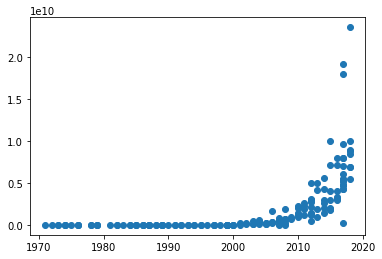

In [27]:
plt.scatter(X,Y)


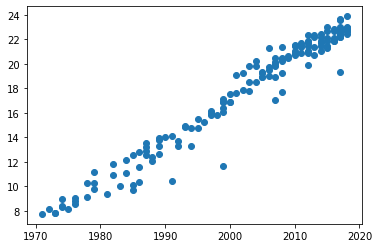

In [28]:
Y = np.log(Y)  # since we want a linear model
plt.scatter(X,Y)

In [0]:
X = X - X.mean()  #not dividing y std dev as its easier to reverse the transformation later

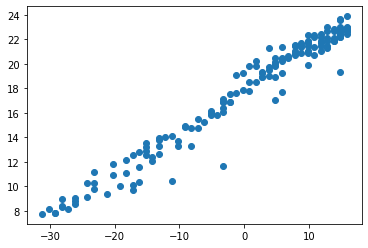

In [30]:
plt.scatter(X,Y)

In [32]:
#create tf model
model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(1,)),
        tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9), loss='mse')

#learning rate scheduler
def schedule(epoch,lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

#train the model
r = model.fit(X,Y,epochs=200,callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 324.4554 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 369.4257 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 299.0340 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 197.4576 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 162.9188 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 126.6433 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 90.0738 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 70.8685 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 50.3776 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 33.1114 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 3

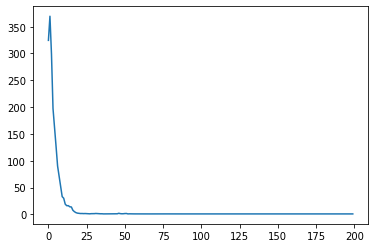

In [33]:
plt.plot(r.history['loss'],label='loss')

In [35]:
#get the slope of the line
#slope of the line is related to the doubling rate of transistor count
print(model.layers)  #note there is only 1 layer, 'input' layer doesnt count
print(model.layers[0].get_weights())

[array([[0.34541443]], dtype=float32), array([17.764917], dtype=float32)]


In [0]:
#the slope of the line is:
a = model.layers[0].get_weights()[0][0,0] # indexing get_weights at 0 to get W and indexing again at [0,0] to get actual scalar value

In [37]:
print(a)

0.34541443


now original eqn C = A*r^t
log C = t*logr + log A
compare with y = ax + b

 r = e^a = e^0.34541 =1.4

time it takes for transistor count to double i.e. increase form C to 2C:

2C/C = (A*r^t')/(A*r^t) => t'-t = (log 2)/(log r) => t'-t = (log 2)/a =~2 
Hence Moore's law proved
